## Adjusting the input of 10000 mesh network
### 1. plot the neurons which has input
### 2. plot the input
### 3. plot the voltage


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

location_file = "/home/zmd/Snudda/10000Sim_input/simulation/3d_point_location.txt"
connection_file = "/home/zmd/Snudda/10000Sim_input/simulation/connection_file.txt"
voltage_file = "/home/zmd/Snudda/10000Sim_input/simulation/volt_20neuron_30Hz.txt"

In [2]:
# get the 3d point location
location = {}
for line in open(location_file,"r"):
    x, y, z, _, _, _, _, id = line.split()
    location[int(id)] = [float(x), float(y), float(z)]

## 1. plot the connection

10000it [00:27, 359.59it/s]


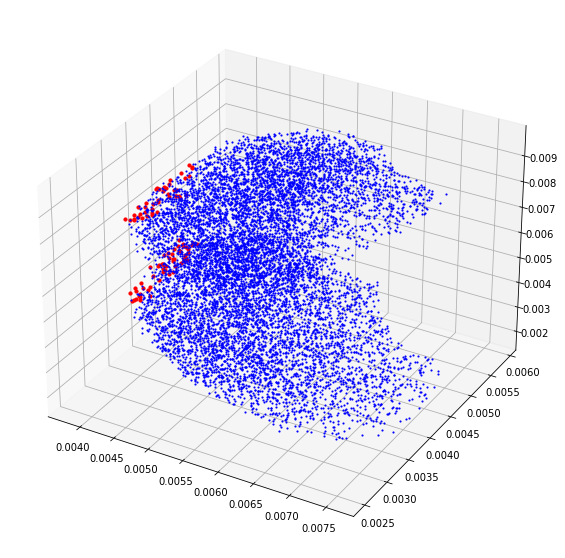

In [8]:
# plot the neurons who has inputs
from tqdm import tqdm
fig_conn = plt.figure(figsize=(10,10))
ax = fig_conn.add_subplot(111, projection='3d')
for line in tqdm(open(connection_file, "r")):
    id, con_in, syn_in, con_out, syn_out = line.split()
    x,y,z = location[int(id)]
    if int(id) in np.arange(0,100,1):
        cl = 'r'
        si = 40
    else:
        cl = 'b'
        si = 5
    ax.scatter(x,y,z, color = cl, marker='.', s=si)

## 2. plot the voltage

In [12]:
import os
#fig_volt = plt.figure('3D scatter plot')
#ax = fig_volt.add_subplot(111, projection='3d')
max_v = -120
min_v = 120
minv = -120
maxv = 60
#ax.cla()
for i in range(1000,2000):
    for line in open(voltage_file, "r"):
        id = line.split(',')[0]
        if id != '-1':
            v = float(line.split(',')[i+3])
            x,y,z = location[int(id)]            
            #ax.scatter(x,y,z, color=((v-minv)/(maxv-minv),0,1-(v-minv)/(maxv-minv)), marker='o')
            if v > max_v:
                max_v = v
            if v < min_v:
                min_v = v
print(i)
    #fig_volt.show()
    #os.system("pause")
print(min_v, max_v)
    

KeyboardInterrupt: 

In [7]:
# show the voltage
from matplotlib import animation 
import sys

def process_bar(percent, start_str='', end_str='', total_length=0):
    bar = ''.join(["\033[31m%s\033[0m"%'   '] * int(percent * total_length)) + ''
    bar = '\r' + start_str + bar.ljust(total_length) + ' {:0>4.1f}%|'.format(percent*100) + end_str
    print(bar, end='', flush=True)

fig_volt = plt.figure(figsize=(20,20))
ax = fig_volt.add_subplot(111, projection='3d')
def animate(i):
    process_bar((i-1000)/600., start_str='', end_str='100%', total_length=15)
    minv = -120
    maxv = 0
    for line in open(voltage_file, "r"):
        id = line.split(',')[0]
        if id != '-1':
            v = float(line.split(',')[i+3])
            if not v:
                print(id, v)
            x,y,z = location[int(id)]
            r = (v-minv)/(maxv-minv)
            if not r:
                print(id, v, r)
            if r < 0:
                r = 0.
            elif r > 1:
                r = 1.
            b = 1-r
            print((r,0,b))
            ax.scatter(x,y,z, color=(r,0,b), marker='.')
        sys.stdout.flush()
volt_animation = animation.FuncAnimation(fig_volt, animate, frames=np.arange(1000,1002,100),interval=1000) 
volt_animation.save('./10000_50ms_300ms_voltage_designedinput.gif', dpi=100, writer='imagemagick') 
print("saved")

66666666663, 0, 0.8050833333333334)
(0.17720055555555558, 0, 0.8227994444444444)
(0.2302088888888889, 0, 0.7697911111111111)
(0.2082922222222222, 0, 0.7917077777777778)
(0.18815833333333332, 0, 0.8118416666666667)
(0.2215977777777778, 0, 0.7784022222222222)
(0.2087788888888889, 0, 0.7912211111111112)
(0.20839, 0, 0.79161)
(0.22765777777777774, 0, 0.7723422222222223)
(0.23880777777777776, 0, 0.7611922222222223)
(0.1817977777777778, 0, 0.8182022222222222)
(0.18237333333333336, 0, 0.8176266666666666)
(0.0886088888888889, 0, 0.911391111111111)
(0.17747999999999997, 0, 0.82252)
(0.22499277777777776, 0, 0.7750072222222222)
(0.1733477777777778, 0, 0.8266522222222222)
(0.23225444444444449, 0, 0.7677455555555555)
(0.18824500000000002, 0, 0.811755)
(0.20527055555555557, 0, 0.7947294444444444)
(0.16993944444444445, 0, 0.8300605555555556)
(0.18318555555555555, 0, 0.8168144444444445)
(0.21995499999999998, 0, 0.780045)
(0.15621055555555557, 0, 0.8437894444444445)
(0.18122722222222226, 0, 0.818772777

ValueError: cannot convert float NaN to integer